In [1]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import random
from collections import defaultdict
import matplotlib.patches as patches

In [2]:
gridworld = np.array([
    ['R', 'R', 'H', 'R', 'R'],
    ['R', 'H', 'H', 'R', 'R'],
    ['R', 'R', 'H', 'H', 'R'],
    ['R', 'H', 'R', 'H', 'R'],
    ['R', 'R', 'R', 'R', 'G']
])

rewards = {

    'G': 10,
    'H': -10,
    'R': -1

}

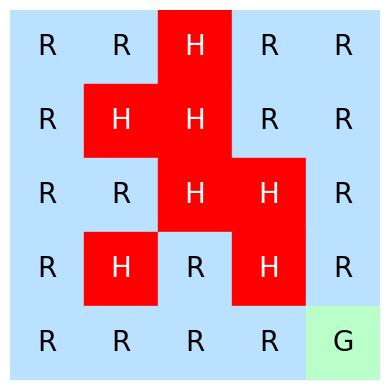

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))
# Create a color map
# Create a color map with lighter colors
color_map = {'H': '#FF0000',  # Darker red
             'G': '#BAFFC9',  # Light green
             'R': '#BAE1FF'}  # Light blue
# Iterate through the grid and color cells
for (i, j), value in np.ndenumerate(gridworld):
    color = color_map[value]
    ax.add_patch(plt.Rectangle((j, 4-i), 1, 1, fill=True, color=color))

# Set the limits of the plot

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
# Remove the axes
ax.set_axis_off()
# Add grid lines
ax.grid(which='major', axis='both', linestyle='-', color='gray', linewidth=1)
# Add text labels to each cell

for (i, j), value in np.ndenumerate(gridworld):
    # Use white text for red cells, black for others
    text_color = 'white' if value == 'H' else 'black'
    ax.text(j + 0.5, 4 - i + 0.5, value, ha='center', va='center', fontsize=20, color=text_color)
# Set the title
# plt.title('Gridworld Visualization', fontsize=16)
# Show the plot
plt.tight_layout()
plt.show()

In [4]:
def policy_visualize(policy, gridworld):
    fig, ax = plt.subplots(figsize=(5, 5))
    # Set the limits of the plot
    ax.set_xlim(0, 5)
    ax.set_ylim(5, 0)  # Reversed y-axis
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    # Draw grid lines
    for i in range(6):
        ax.axhline(y=i, color='gray', linestyle='-', linewidth=0.5)
        ax.axvline(x=i, color='gray', linestyle='-', linewidth=0.5)
    # Dictionary to map directions to arrow symbols
    direction_to_arrow = {
        'up': '↑',
        'down': '↓',
        'left': '←',
        'right': '→'
    }
    # Color mapping
    color_map = {'H': 'red', 'R': 'lightblue', 'G': 'lightgreen'}
    # Plot arrows and cell coordinates for each cell
    for y in range(5):
        for x in range(5):
            # Color the cell based on gridworld
            cell_type = gridworld[y, x]
            rect = patches.Rectangle((x, y), 1, 1, facecolor=color_map[cell_type])
            ax.add_patch(rect)
            # Plot cell coordinates
            ax.text(x + 0.1, y + 0.2, f'{y},{x}', ha='left', va='top', fontsize=10)
            # Plot arrow if the cell is in the policy and not (4,4)
            if (y, x) in policy and (y, x) != (4, 4):
                direction = policy[(y, x)]
                if direction in direction_to_arrow:
                    arrow = direction_to_arrow[direction]
                    ax.text(x + 0.5, y + 0.6, arrow, ha='center', va='center', fontsize=8)
    # Show the plot
    plt.title("Policy Visualization with Cell Coordinates")
    plt.tight_layout()
    plt.show()

### Start cell of an episode

In [94]:
terminal_state = (4, 4)

rows = 5
cols = 5

# Function to select a random tuple from the grid, excluding the terminal state
def select_random_tuple():
    while True:
        # Generate random row and column indices
        row = random.randint(0, rows - 1)
        col = random.randint(0, cols - 1)
        # Check if the generated tuple is not the terminal state
        if (row==1 and col==1) or (row==0 and col==1) or (row==4 and col==4):
          continue
        return (row, col)

## Play an episode

In [ ]:
def get_next(r,c, dir_cc): ### Heps in getting next cell based on direction
  
  dir = dir_cc

  row = r
  col = c

  if dir == 'up': 
            if row-1>=0:
                next_cell = (row-1, col)
            else:
                next_cell = (row, col)

  elif dir == 'down':
            if row+1<=len(gridworld)-1:
                next_cell = (row+1, col)
            else:
                next_cell = (row, col)

  elif dir == 'right':
            if col+1<=len(gridworld[0])-1:
                next_cell = (row, col+1)
            else:
                next_cell = (row, col)
            

  elif dir == 'left':
            if col-1<0:
                next_cell = (row,col)
            else:
                next_cell = (row, col-1)

  return next_cell

In [226]:
def get_next_state(r, c, action):
    if action == 'up':
        return r-1, c
    elif action == 'down':
        return r+1, c
    elif action == 'left':
        return r, c-1
    elif action == 'right':
        return r, c+1
    return r, c  # Default case, should not happen

def valid_actions(r, c, grid_shape):
    actions = ['up', 'down', 'left', 'right']
    valid = []
    for action in actions:
        next_r, next_c = get_next_state(r, c, action)
        if 0 <= next_r < grid_shape[0] and 0 <= next_c < grid_shape[1]:
            if (next_r, next_c) not in [(0,1), (1,1)]:
                valid.append(action)
    return valid

def epsilon_greedy(r, c, policy):

    available_actions = valid_actions(r, c, gridworld.shape)
    if not available_actions:
        return None  # No valid actions available
    if random.random() < 0.2:
        # Exploration: choose a random action from valid actions
        action = random.choice(available_actions)
    else:
        # Exploitation: choose the action from policy, but ensure it's valid
        action = policy[(r,c)]

    return action

In [ ]:
def play_episode(policy):
    global W

    current_cell = select_random_tuple()


    epi_track = []

    for i in range(L): 
        
        row, col = current_cell

        if current_cell == (4,4):
            W = W+0.001*(10 - np.dot(W,np.array([4,4,1, 0, 0,0])))*np.array([4,4,1, 0, 0,0])
            break  

        dir = epsilon_greedy(row, col, policy)
        
        next_cell = get_next(row, col, dir)

        state[row][col] = state[row][col]+alpha*(rewards[gridworld[row][col]]+gamma*state[next_cell[0]][next_cell[1]]- state[row][col])

        y = state[row][col]

        ###### Feature telling how many of the surrounding values are fire

        fea_cnt = 0
        if row-1>=0:
            if rewards[gridworld[row-1][col]]==-10:
                fea_cnt+=1
        if row+1<=len(gridworld)-1:
            if rewards[gridworld[row+1][col]]==-10:
                fea_cnt+=1
        if col+1<=len(gridworld[0])-1:
            if rewards[gridworld[row][col+1]]==-10:
                fea_cnt+=1
        if col-1>=0:
            if rewards[gridworld[row][col-1]]==-10:
                fea_cnt+=1


        if rewards[gridworld[row][col]] == -10:
            phi = np.array([row, col, -1, fea_cnt,row-4, col-4])
        elif rewards[gridworld[row][col]] == -1:
            phi = np.array([row, col, 1, fea_cnt,col-4, col-4])

        #### Update weights
        W = W+0.002*(y-np.dot(W, phi))*phi

        current_cell = next_cell

    return epi_track

### Update policy

In [228]:
def update_policy(temp, policy):
    for row in range(len(temp)):
        for col in range(len(temp[0])):

            if (row==4 and col==4):
                continue

            maxi = [-np.inf, None]

            if row-1>=0 and rewards[gridworld[row][col]]+gamma*temp[row-1][col]>maxi[0]:
                maxi =  [rewards[gridworld[row][col]]+gamma*temp[row-1][col], "up"] 

            if row+1<=len(temp)-1 and rewards[gridworld[row][col]]+gamma*temp[row+1][col]>maxi[0]:
                maxi =  [rewards[gridworld[row][col]]+gamma*temp[row+1][col] , "down"]  

            if col-1>=0 and rewards[gridworld[row][col]]+gamma*temp[row][col-1]>maxi[0]:
                maxi =  [rewards[gridworld[row][col]]+gamma*temp[row][col-1], "left"]    
                  
            if col+1<=len(temp[0])-1 and rewards[gridworld[row][col]]+gamma*temp[row][col+1]>maxi[0]:
                maxi =  [rewards[gridworld[row][col]]+gamma*temp[row][col+1], "right"] 

            policy[(row, col)] = maxi[1]

    return policy

In [229]:
def check_policy_change(dict1, dict2):
    if dict1.keys() != dict2.keys():
        return "No"
    for key in dict1.keys():
        if dict1[key] != dict2[key]:
            return "No"
    return "Yes"

### Initialise policy

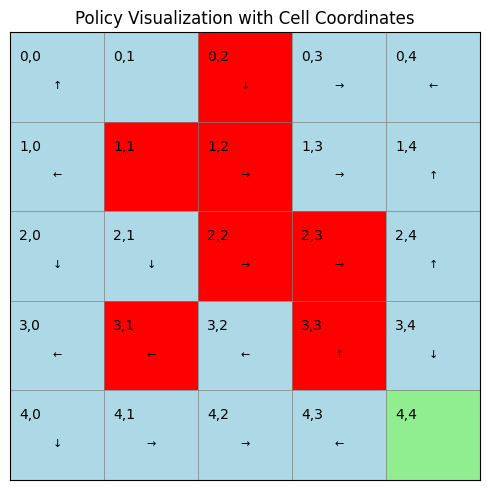

In [230]:

def get_valid_actions(row, col, grid_shape):
    actions = ['up', 'down', 'left', 'right']
    valid_actions = []
    for action in actions:
        new_row, new_col = row, col
        if action == 'up' and row > 0:
            new_row -= 1
        elif action == 'down' and row < grid_shape[0] - 1:
            new_row += 1
        elif action == 'left' and col > 0:
            new_col -= 1
        elif action == 'right' and col < grid_shape[1] - 1:
            new_col += 1
        # Check if the new state is not (0,1) or (1,1)
        if (new_row, new_col) not in [(0,1), (1,1)]:
            valid_actions.append(action)
    return valid_actions
    
def create_policy(gridworld):
    policy = {}
    for row in range(gridworld.shape[0]):
        for col in range(gridworld.shape[1]):
            if (row == 0 and col == 1) or (row == 1 and col == 1):
                continue
            valid_actions = get_valid_actions(row, col, gridworld.shape)
            if valid_actions:
                action = np.random.choice(valid_actions)
                policy[(row, col)] = action
    return policy

policy = create_policy(gridworld)
policy_visualize(policy, gridworld)

### Hyperparameters


In [ ]:
L = 15
alpha = 0.2
gamma = 0.8
thresh = 0.12


state = np.zeros(gridworld.shape)
state[4,4] = 10

## initialise W
W = np.random.normal(0, 1, 6)
Wo = W

In [233]:
loss = []
for m in range(50000):
    d = {}

    ep = play_episode(policy)
    
    #policy = update_policy(state, policy)
    d = np.linalg.norm(W-Wo)
    loss.append(d)
    if d < 0.001:
        print(W)
        print(Wo)
        print(d)
        print("converged W", m)
        break

    Wo = W

[ 0.32814779 -2.72380537  5.68840388 -0.33826965  0.08883427  2.60704715]
[ 0.3283632  -2.72380537  5.68850196 -0.33805424  0.08844194  2.60665483]
0.0006405186345846841
converged W 2489


### Using Estimates to predict values of states

In [234]:
new_sv = np.zeros(gridworld.shape)
new_sv[4,4]=10

for i in range(5):
  for j in range(5):

        fea_cnt = 0
        if i-1>=0:
            if rewards[gridworld[i-1][j]]==-10:
                fea_cnt+=1
        if i+1<=len(gridworld)-1:
            if rewards[gridworld[i+1][j]]==-10:
                fea_cnt+=1
        if j+1<=len(gridworld[0])-1:
            if rewards[gridworld[i][j+1]]==-10:
                fea_cnt+=1
        if j-1>=0:
            if rewards[gridworld[i][j-1]]==-10:
                fea_cnt+=1
        if rewards[gridworld[i,j]] == -10:
          vec = np.array([i, j, -1, fea_cnt,i-4,j-4])
        elif rewards[gridworld[i,j]] == -1:
          vec = np.array([i, j, 1, fea_cnt, i-4,j-4])
        if i==4 and j==4:
          continue
        new_sv[i,j] = np.dot(W,vec)


new_policy = update_policy(new_sv, policy)


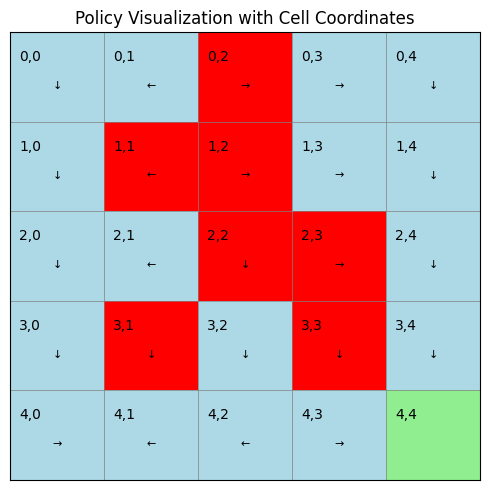

In [235]:
policy_visualize(new_policy, gridworld) 